# <span style = "color:IndianRed; font-size:40px"> Brain Tumor Classification (MRI)</span>

***

To Detect and Classify Brain Tumor using CNN, and TL; as an asset of Deep Learning and to examine the tumor position(segmentation).

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
import glob
from sklearn.metrics import confusion_matrix,classification_report

#### Use glob

The data contains 4 subclasses. Store all 4 in different variables

In [114]:
glioma_tumor = glob.glob("Brain_tumor/Training/glioma_tumor/*.jpg")
meningioma_tumor = glob.glob("Brain_tumor/Training/meningioma_tumor/*.jpg")
no_tumor = glob.glob("Brain_tumor/Training/no_tumor/*.jpg")
pituitary_tumor = glob.glob("Brain_tumor/Training/pituitary_tumor/*.jpg")

### Fetch the testing data

In [115]:
glioma_tumor_test = glob.glob("Brain_tumor/Testing/glioma_tumor/*.jpg")
meningioma_tumor_test = glob.glob("Brain_tumor/Testing/meningioma_tumor/*.jpg")
no_tumor_test = glob.glob("Brain_tumor/Testing/no_tumor/*.jpg")
pituitary_tumor_test = glob.glob("Brain_tumor/Testing/pituitary_tumor/*.jpg")

In [116]:
print(f"Number of images in Training set are:\nGlioma:{len(glioma_tumor)}\nMeninglioma:{len(meningioma_tumor )}\nNo Tumor:{len(no_tumor)}\nPituitary:{len(pituitary_tumor)}")

Number of images in Training set are:
Glioma:84
Meninglioma:72
No Tumor:72
Pituitary:84


In [117]:
print(f"Number of images in Training set are:\nGlioma:{len(glioma_tumor_test)}\nMeninglioma:{len(meningioma_tumor_test)}\nNo Tumor:{len(no_tumor_test)}\nPituitary:{len(pituitary_tumor_test)}")

Number of images in Training set are:
Glioma:24
Meninglioma:24
No Tumor:24
Pituitary:24


### Store all the images inside a list and create a list with the corresponding labels

### For Training set

In [118]:
image = []
label = []

for i in glioma_tumor:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in meningioma_tumor:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in no_tumor:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in pituitary_tumor:
    img = plt.imread(i)
    image.append(img)
    label.append(3)
    


In [119]:
label_dict = {0:'glioma_tumor',1:'meningioma_tumor',2:'no_tumor',3:'pituitary_tumor'}

### For Testing set

In [120]:
image_test = []
label_test = []

for i in glioma_tumor_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)
    
for i in meningioma_tumor_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

for i in no_tumor_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(2)
    
for i in pituitary_tumor_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(3)

### Shuffle both image list and label list (In both Training and testing set)

In [121]:
image , label = shuffle(image, label , random_state= 100)

In [122]:
image_test , label_test = shuffle(image_test, label_test , random_state= 100)

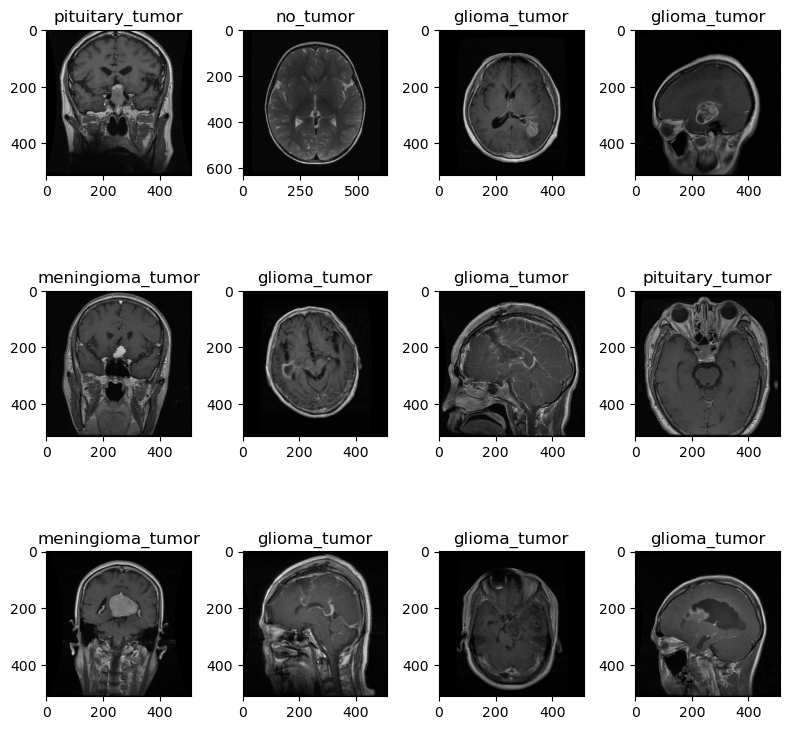

In [123]:
plt.figure(figsize = (8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label_dict[label[i]])
plt.tight_layout()

### Check the shape of the first 10 images in our list (Either from training or test set)

In [124]:
images = image[:10]

for i in images:
    print(i.shape)

(512, 512, 3)
(630, 630, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


### Reshape the images to 224x224( For both training and testing set)

Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [125]:
X_train = []

for i in image:
    X_train.append(resize(i, (224,224,3)))

In [126]:
X_test = []

for i in image_test:
    X_test.append(resize(i, (224,224,3)))

In [127]:
X_train = np.array(X_train)
X_test = np.array(X_test)

### Create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [128]:
y_train = np.array(label)
y_test = np.array(label_test)


### Plot some of our reshaped images

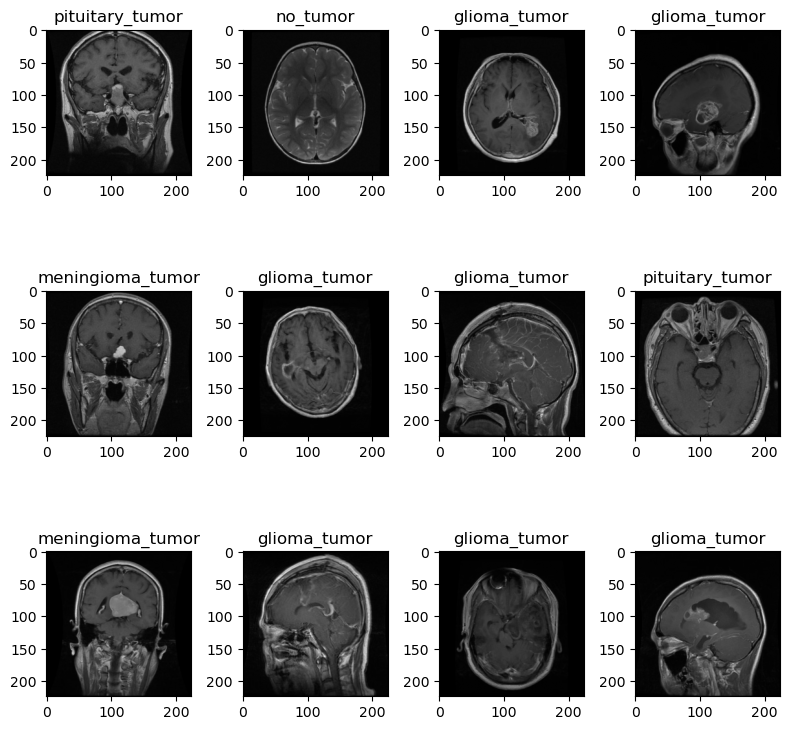

In [129]:
plt.figure(figsize = (8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    plt.title(label_dict[y_train[i]])
plt.tight_layout()

### Check the shape of X_train and X_test and y_train and y_test

In [130]:
print(f"Shape of X_train is:{X_train.shape}\nShape of X_test is:{X_test.shape}\nShape of y_train is:{y_train.shape}\nShape of y_test is:{y_test.shape}")

Shape of X_train is:(312, 224, 224, 3)
Shape of X_test is:(96, 224, 224, 3)
Shape of y_train is:(312,)
Shape of y_test is:(96,)


### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [131]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (224,224,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid')
    
])

### Compile the model

#### Use 'sparse_categorical_crossentropy' for loss

In [132]:
model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [133]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 64)       

### Check the summary of our model

### Train the model. 
Make sure to include a validation data with validation_split

In [134]:
model.fit(X_train,y_train,epochs= 5,validation_split=0.05)

Epoch 1/5
10/10 [==============================] - 14s 1s/step - loss: 1.2668 - accuracy: 0.3784 - val_loss: 0.9002 - val_accuracy: 0.6250
Epoch 2/5
10/10 [==============================] - 11s 1s/step - loss: 0.6552 - accuracy: 0.7703 - val_loss: 0.2836 - val_accuracy: 0.9375
Epoch 3/5
10/10 [==============================] - 11s 1s/step - loss: 0.3583 - accuracy: 0.8784 - val_loss: 0.1612 - val_accuracy: 0.9375
Epoch 4/5
10/10 [==============================] - 11s 1s/step - loss: 0.1273 - accuracy: 0.9595 - val_loss: 0.1238 - val_accuracy: 0.9375
Epoch 5/5
10/10 [==============================] - 11s 1s/step - loss: 0.0405 - accuracy: 0.9899 - val_loss: 0.0304 - val_accuracy: 1.0000


### Evaluate the model

In [135]:
model.evaluate(X_train,y_train)

10/10 [==============================] - 3s 327ms/step - loss: 0.0184 - accuracy: 0.9968


[0.018387628719210625, 0.9967948794364929]

### Make predictions with X_test

In [147]:
predict = model.predict(X_test)

3/3 [==============================] - 1s 332ms/step


In [148]:
predict[0]

array([0.9159088 , 0.93965364, 0.8591986 , 0.00113282], dtype=float32)

### Use np.argmax to fetch indices of max element of the array

Store the values in a list

In [149]:
y_pred  = [np.argmax(i) for i in predict]

In [150]:
y_pred[:5]

[1, 2, 2, 2, 1]

### Plot X_test with label from our prediction

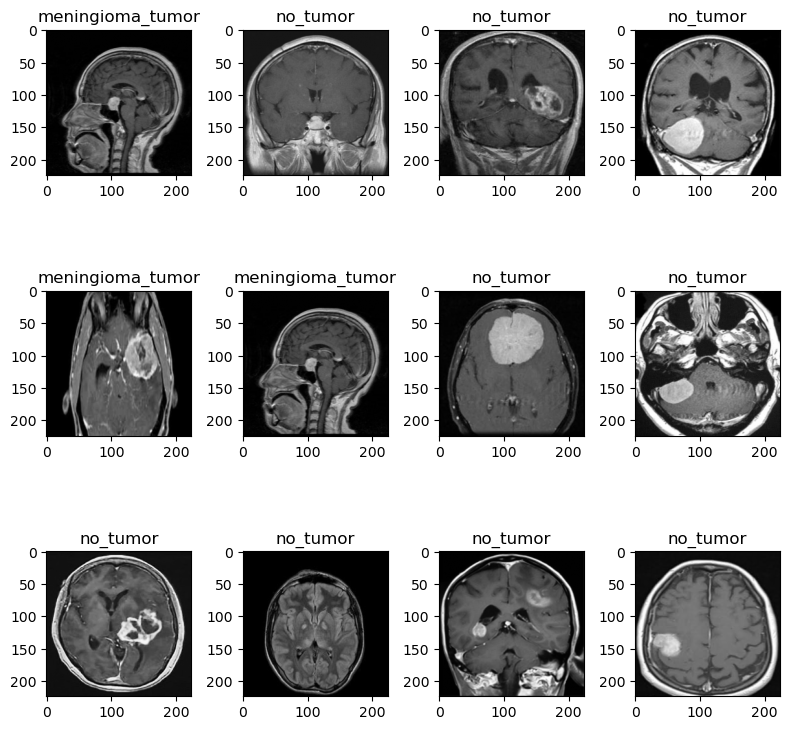

In [151]:
plt.figure(figsize = (8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    plt.title(label_dict[y_pred[i]])
plt.tight_layout()

### Visualise confusion matrix on a heatmap

<Axes: >

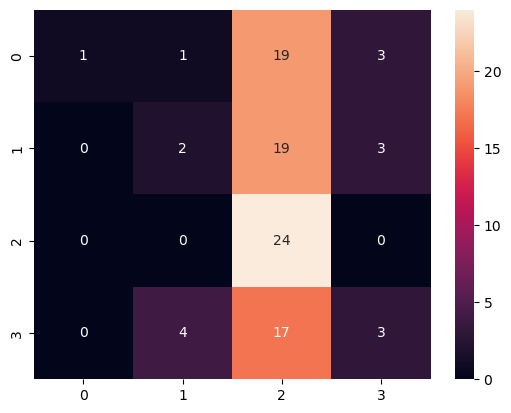

In [153]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       0.29      0.08      0.13        24
           2       0.30      1.00      0.47        24
           3       0.33      0.12      0.18        24

    accuracy                           0.31        96
   macro avg       0.48      0.31      0.21        96
weighted avg       0.48      0.31      0.21        96



***